In [1]:
import pandas as pd
import numpy as np
import math
import sys

Generacion de parametros exponenciales para RTW

In [2]:
def paramsGene(a,b,c,d):
    P1  =   [1 for i in range(c)]
    P2  =   [max(int(math.floor(b*(1-math.exp(d))/(1-math.exp(d*a))*math.exp(d*i))),1) for i in range(c,a+c-1)]
    P   =   np.concatenate([P1, P2])
    return P

a = 15
b = 720
c = 3
d = 0.05
P=paramsGene(a,b,c,d)
P[10],P,len(P)

(54,
 array([ 1,  1,  1, 38, 40, 42, 44, 46, 49, 51, 54, 57, 60, 63, 66, 69, 73]),
 17)

Creacion de Carpeta con todos los .params a probar

In [3]:
def createFolderParams(address):
    for a in [15*_ for _ in [1,3,9,27]]:
        for b in [100*__ for __ in [1,3,9,27]]:
            for c in [3*___ for ___ in [1,3,9,27]]:
                for d in [0.01*____ for ____ in [1,3,9,27]]:
                    P=paramsGene(a,b,c,d)
                    S=str(a)+"_"+str(b)+"_"+str(c)+"_"+str(d)+".params"
                    S=address+'/'+S
                    A=open(S,"w")
                    A.write("[OPP]\n")
                    A.write("ExecutionMethod=RTW\n")
                    line="AggregationPattern="+str(P[0])
                    for ii in range(1,len(P)):
                        line+= ","+str(P[ii])
                    A.write(line+"\n")
                    A.write("RTWMovement=10000 \n")
                    A.close()
                    
createFolderParams('/Users/icipriano/Repositorios/DefinitiveUGTest/UG_RTWpatternGen/ParamsFolder')                  

Creacion del archivo para copy-paste desde mansci

In [1]:
#alicantools slurm opp --binary ~/OPP_SOLVER_1.12.x-jan27 -i Agricola -x ~/AuditoriaUGwRTW/1_Inputs/emptyParams.params
def mansciLauncher(address):
    S=address+'/'+ 'mansci_copypaste_launcher.txt'
    addressmansci = '~/DefinitiveUGTest/UG_RTWpatternGen/ParamsFolder'
    A=open(S,"w")
    for name in ['UDM1_STOCK_N','Dominion10','Dominion5','Caverna','UG_Model_DSR_03CU','Catan3','Catan','Catan10','UDM1_STOCK_Y','Agricola10','Agricola60','Agricola','Dominion','Gloom30','Lareina','Gloom','Dominion3','Catan5','Agricola30']:
        for a in [15*_ for _ in [1,3,9,27]]:
            for b in [100*__ for __ in [1,3,9,27]]:
                for c in [3*___ for ___ in [1,3,9,27]]:
                    for d in [0.01*____ for ____ in [1,3,9,27]]:
                        params = str(a)+"_"+str(b)+"_"+str(c)+"_"+str(d)+".params"
                        linea='alicantools slurm opp ' + '--binary ~/BINARIO_TONHO_7FEB '  + '-i ' + name + ' -x ' + addressmansci +'/'+ params + '                                       '
                        A.write(linea+"\n")
    A.close()

mansciLauncher('/Users/icipriano/Repositorios/DefinitiveUGTest/UG_RTWpatternGen')

Creacion de los parametros para aggLP

In [2]:
def paramsGene(a,b,c,d):
    P1  =   [1 for i in range(c)]
    P2  =   [max(int(math.floor(b*(1-math.exp(d))/(1-math.exp(d*a))*math.exp(d*i))),1) for i in range(c,a+c-1)]
    P   =   np.concatenate([P1, P2])
    return P


In [17]:
a = 15*9
b = 9*100
c = 3*9
d = 0.01
P=paramsGene(a,b,c,d)
P

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15])

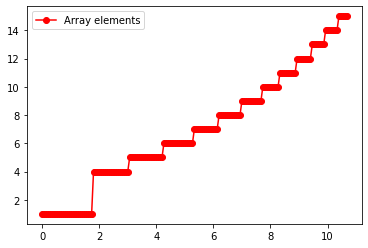

In [18]:
import matplotlib.pyplot as plt

N = max(P)
x = np.array([i/N for i in range(len(P))])
y = np.array(P)
plt.plot(x, y, color = "red", marker = "o", label = "Array elements")
plt.legend()
plt.show()